In [1]:
import numpy as np
import matplotlib.pyplot as plt

We have:
$$x^{k+1} = x^{k} - \eta \cdot \nabla f(x^{k})$$
$$\varphi(\eta) = f(x^{k} - \eta \cdot \nabla f(x^{k}))$$
Solving:
$$ \varphi(\eta) \rightarrow min_\eta $$

$$\varphi(\eta) = f(x^{k} - \eta \cdot \nabla f(x^{k})) \approx f(x^{k}) - \eta \cdot \nabla f(x^{k}) \cdot \nabla f(x^{k}) =
f(x^{k}) - \eta \cdot \lVert \nabla f(x^{k}) \rVert_2^2$$

Suppose 
$$\alpha,\beta \in (0, 1), \alpha < \beta$$
$$\varphi_1(\eta) = f(x^{k}) - \eta \cdot \alpha \cdot \lVert \nabla f(x^{k}) \rVert_2^2$$
$$\varphi_2(\eta) = f(x^{k}) - \eta \cdot \beta \cdot \lVert \nabla f(x^{k}) \rVert_2^2$$

Want:
$$ \eta: \varphi_2(\eta) \leqslant \varphi(\eta) \leqslant \varphi_1(\eta)$$

In [140]:
def gd_update_eta(x, function, grad, alpha, beta):
    eta=0.05
    max_eta=10000.0
    min_eta=0.0
    value = function(x)
    l2_grad = np.sum(grad**2)
    dd = 99999
    for i in range(1,dd):
# #         eta = min_eta + (max_eta-min_eta)/2
        
#         print(f'{x = }')
#         print(f'{(x - eta*grad) = }')
#         print(f'{eta = }')
#         print(f'{grad = }')
        f = function(x - eta*grad)
        f1 = value - eta * alpha * l2_grad
        f2 = value - eta * beta * l2_grad  
#         if (i > 0):
#             print(i)
#             print(f'{i = }')
#             print(f'{(alpha - beta) = }')
#             print("{:.9f}|  {:.9f}   |{:.9f}".format(f1, f, f2))
#             print(f'{(f1 - f2) = }')
#             print("{:.9f}|  {:.9f}   |{:.9f}".format(value, eta*alpha*np.sum(grad**2), eta*beta *np.sum(grad**2)))
#             print()
        
        if f <= f1 and f >= f2:
            return (eta, i)
        if f >= f1:
#             max_eta = eta
#             eta = eta + min_
            eta = eta * (1 - 0.4/(i**0.5))
        if f <= f2:
            min_eta = eta
            eta = eta * (1 + 0.9/i**0.5)
    print("reached max iter")
    return (eta, dd)

In [152]:
def gd(left, right, function, derrivate, tolerance, max_steps, alpha, beta):
    function.calls = 0
    
    x_cur = left + (right-left)/2
    x_prev = x_cur
    iter_count = 0
    iter_count_rule = 0
    while True:
        iter_count += 1
        grad = derrivate(x_cur)
        
        eta, tmp_count = gd_update_eta(x_cur, function, grad, alpha, beta)
        iter_count_rule += tmp_count
        x_cur = max(min(x_cur-eta*grad, right), left)
        
        if abs(function(x_cur) - function(x_prev)) <= tolerance:
#             print()
            info = "dropped by tolerance"
            break
        if (iter_count >= max_steps):
            info = "dropped by max steps"
            break
        x_prev = x_cur
    return {'point': x_cur, 'params':{'iter_count': iter_count_rule, 'calc_count': function.calls, 'info': info}}

In [153]:
# def f(x):
#     f.calls +=1
#     return (x-0.97)**2
# f.calls=0

# def d_f(x):
#     return (x-0.97)*2

# res = gd(-2, 2, f, d_f, tolerance = 0.001, max_steps = 1000, alpha = 0.6, beta = 0.8)
# # steps=np.array(steps)
# print(res)
# params=res['params']
# point = res['point']
# # print(steps[-1])
# print(point)

# print(f(0.97)-f(point))
# f.calls

In [154]:
import time

In [155]:
def counted(f):
    def wrapped(*args, **kwargs):
        wrapped.calls += 1
        return f(*args, **kwargs)
    wrapped.calls = 0
    return wrapped

In [156]:
accuracy_grid = np.linspace(0.0001, 0.001, 10)
alpha = 0.7
beta = 0.8

functions = list(map(counted, [
    lambda x: x**2,
    lambda x: (x+5)**4,
    lambda x: x*np.exp(x),
    lambda x: x*np.exp(-x),
    lambda x: x**4/np.log(x)
]))

derrivaties = [
    lambda x: 2*x,
    lambda x: 4*(x+5)**3,
    lambda x: np.exp(x) + x*np.exp(x),
    lambda x: np.exp(-x) - x*np.exp(-x),
    lambda x: (4*x**3)/np.log(x) - (x**3)/(np.log(x))**2
]

borders = np.array([[-1, 10], [-6, 2], [-2, 0], [-2, 6], [1.1, 1.5]])

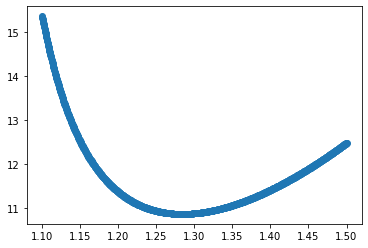

In [157]:
f_ind = 4
plt.scatter(np.linspace(*borders[f_ind], 1000), functions[f_ind](np.linspace(*borders[f_ind], 1000)))

In [158]:
f_ind = 0
gd(*borders[f_ind], functions[f_ind], derrivaties[f_ind], 1e-10, np.inf, 0.7, 0.8)

{'point': 3.4883632123664687e-06,
 'params': {'iter_count': 88,
  'calc_count': 154,
  'info': 'dropped by tolerance'}}

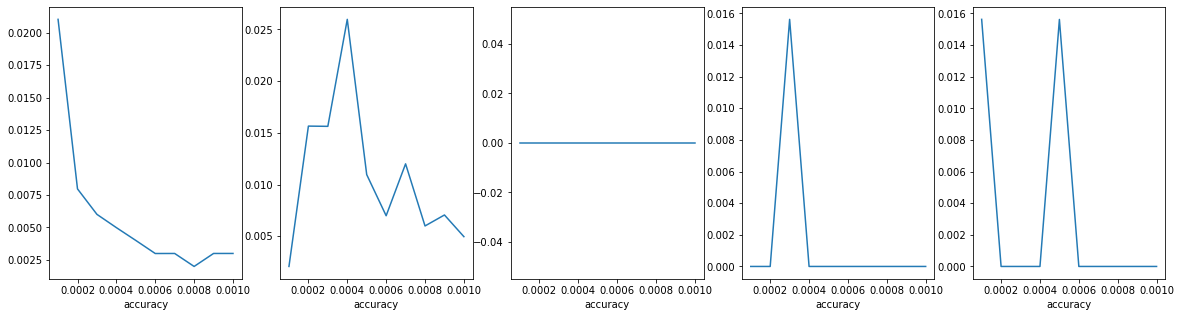

In [159]:
times=[]

f_ind = 4
plt.figure(figsize = (20, 5))
plt.ylabel('time')

for f_ind in range(0, 5):   
    for acc in accuracy_grid:
        start = time.time()

        res = gd(left = borders[f_ind, 0], right = borders[f_ind, 1], function = functions[f_ind], derrivate = derrivaties[f_ind], 
                 tolerance = 1e-13, max_steps = np.inf, alpha = alpha, beta = alpha + acc)
        params=res['params']
        point = res['point']

        end = time.time()
        times.append(end - start)
        
    ax = plt.subplot(1, 5, f_ind+1)
    plt.plot(accuracy_grid, times, alpha = 6)
    plt.xlabel('accuracy')

    times = []

In [160]:
# accuracy = np.linspace(0.001, 0.01, 10)
alpha=0.8

iter_counts=[]

In [161]:
# plt.plot(accuracy, times, alpha = 6)

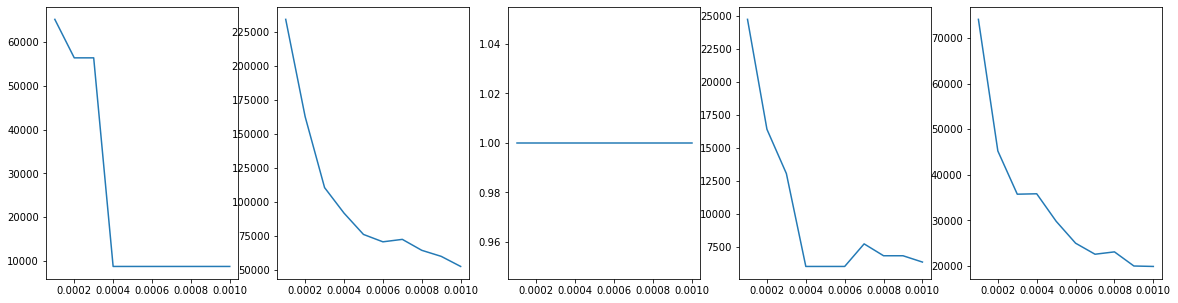

In [162]:

plt.figure(figsize = (20, 5))
for f_ind in range(0, 5):
    for acc in accuracy_grid:
        
        res = gd(left = borders[f_ind, 0], right = borders[f_ind, 1], function = functions[f_ind], derrivate = derrivaties[f_ind], 
                 tolerance = 1e-13, max_steps = np.inf, alpha = alpha, beta = alpha + acc/100)

        params=res['params']
        point = res['point']
        
        iter_counts.append(params['iter_count'])
        
    plt.subplot(1, 5, f_ind+1)
    plt.plot(accuracy_grid, iter_counts, alpha = 6)
    iter_counts = []

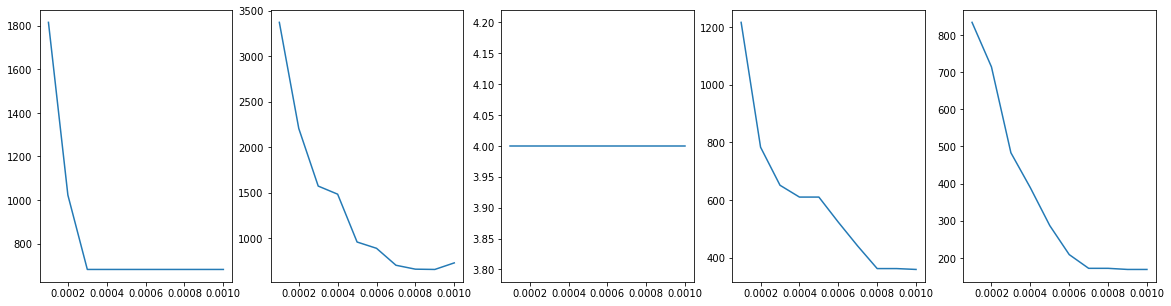

In [163]:
plt.figure(figsize = (20, 5))
for f_ind in range(0, 5):
    calc_counts = []
    for acc in accuracy_grid:
        res = gd(left = borders[f_ind, 0], right = borders[f_ind, 1], function = functions[f_ind], derrivate = derrivaties[f_ind], 
                 tolerance = 1e-3, max_steps = np.inf, alpha = alpha, beta = alpha + acc)

        params = res['params']
        point  = res['point']
        
        calc_counts.append(params['calc_count'])
        
    plt.subplot(1, 5, f_ind+1)
    plt.plot(accuracy_grid, calc_counts, alpha = 6)


In [165]:
# plt.plot(accuracy, calc_counts)